In [1]:
import matplotlib.pyplot as plot
%matplotlib inline

import numpy as np

In [20]:
x_ = np.linspace(-100, 100, 200)
x, y = np.meshgrid(x_, x_, indexing='ij')
nx, ny = x.shape
nz = 1

In [21]:
mask = np.sqrt(x*x + y*y) < 25

In [22]:
d = 1. - np.cos((x + y)/10)
#d = 1. - np.cos((x)/10)

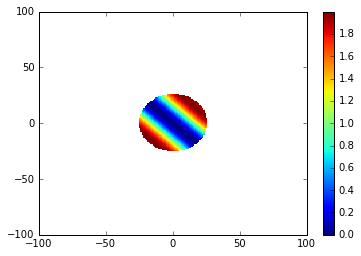

In [23]:
plot.pcolormesh(x, y, np.ma.masked_array(d, mask=np.logical_not(mask)))
plot.colorbar()

In [24]:
from scipy.io import netcdf_file

In [25]:
fh = netcdf_file("mask_field.nc", "w")

fh.createDimension("x", nx)
fh.createDimension("y", ny)
fh.createDimension("z", nz)

maskext = fh.createVariable("maskext", np.int16, ("x", "y", "z"))
maskext[:,:,0] = mask.astype(np.int16)

fieldext = fh.createVariable("fieldext", np.int16, ["x", "y", "z"])
d_scaled = (d - d.min())/(d.max() - d.min())*np.iinfo(np.int16).max
fieldext[:,:,0] = d_scaled.astype(np.int16)

fh.close()